<span style="color:#44f;font-weight:bold;">Codes for CNS2025: Lecture 11</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Population response (10 neurons/tuning curves)

In [2]:
def gaussian_func(x,a,sigma=1.0):
    return np.exp(-((x-a)/sigma)**2/2)

In [3]:
xs = np.linspace(-5,5,1000)

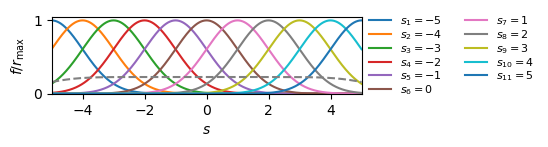

In [4]:
f = np.zeros_like(xs) # Accumulator to total response
plt.figure(figsize=(4,1))
for n,sa in enumerate(np.arange(-5,6),start=1): # Different tuning curve centers
    f_sa = gaussian_func(xs,sa) # Response of turning curve centers at `sa`
    plt.plot(xs,f_sa,label=f'$s_{{{n}}} = {sa}$')
    f += f_sa
plt.plot(xs,f/11,'--',color='gray',)
plt.ylim(0,)
plt.xlim(-5,5)
plt.xlabel('$s$')
plt.ylabel('$f/r_\\max$')
plt.legend(ncols=2,labelspacing=0,fontsize=8,loc=(1.01,-.1),frameon=False)
plt.show()

## Generate sample data

In [5]:
sa_values = np.arange(-5,6) # Range of $s_a$
rmax = 10 # Peak spike count of tuning curves

In [6]:
tuning_curves = [ # Array of tuning curves
    (lambda i:lambda x:gaussian_func(x,i))(sa)
    for sa in sa_values
]

In [7]:
# Simulate response from the neurons when s = 0
rng = np.random.default_rng(123)
spike_counts = np.array([rng.poisson(rmax*f_s(0)) for f_s in tuning_curves])
print(spike_counts)

[ 0  0  0  0  9 12  6  1  0  0  0]


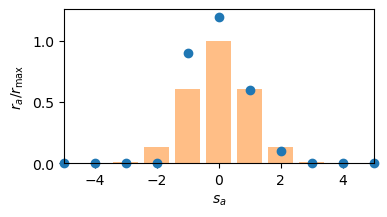

In [8]:
plt.figure(figsize=(4,2))
plt.plot(sa_values,spike_counts/rmax,'o',clip_on=False)
plt.bar(sa_values,tuning_curves[5](sa_values),color='C1',alpha=0.5) # Neuron center at s = 0
plt.xlabel(r'$s_a$')
plt.ylabel(r'$r_a/r_\max$')
plt.xlim(-5,5)
plt.ylim(0,)
plt.show()

## ML estimate

In [9]:
from IPython.display import HTML

In [10]:
s_ML = (spike_counts*sa_values).sum()/spike_counts.sum()
HTML(f'$s_\\mathrm{{ML}}={s_ML:g}$')

\begin{align*}
    P[\mathbf{r}|s] & = \prod_{a=1}^N \frac{(f_a(s)T)^{r_aT}}{(r_aT)!} \exp(-f_a(s)T) \\
    & = \prod_{a=1}^N P_\mathrm{Poisson}\left(r_aT,f_a(s)T\right)
\end{align*}
where
$$ P_\mathrm{Poisson}(k,\mu) = \frac{\mu^k}{k!}\exp(-\mu)$$
The last function is available in `scipy.stats`:
```
poisson.pmf(k,mu)
```

In [11]:
fas = lambda s:np.array([fa(s) for fa in tuning_curves]) # $f_a(s)$

In [12]:
from scipy.stats import poisson

In [13]:
ss = np.arange(-1,1.0001,ds:=2**-10) # Range of s
vs = np.array([poisson.pmf(spike_counts,fas(x)).prod() for x in ss])
vs /= (ds*vs.sum())

## With prior

In [14]:
ms = vs*gaussian_func(ss,-2)
ms /= ((ss[1]-ss[0])*ms.sum())

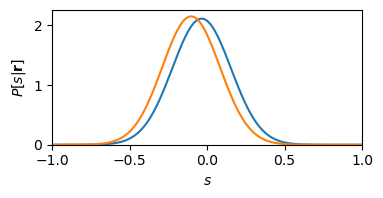

In [15]:
plt.figure(figsize=(4,1.75))
plt.plot(ss,vs)
plt.plot(ss,ms)
plt.xlim(-1,1)
plt.ylim(0,)
plt.xlabel('$s$')
plt.ylabel(r'$P[s|\mathbf{r}]$')
plt.show()

<hr>
<address style="color:#44f;font-style:italic;font-weight:bold;"><a href="https://cc.tir.tw/wk/2025cns">CNS2025</a></address>